# Simulation of Waveguide

Cutoff frequency: 3000000000.0 Hz
Start simulating...
Quivering B-field...
Quivering E-field...


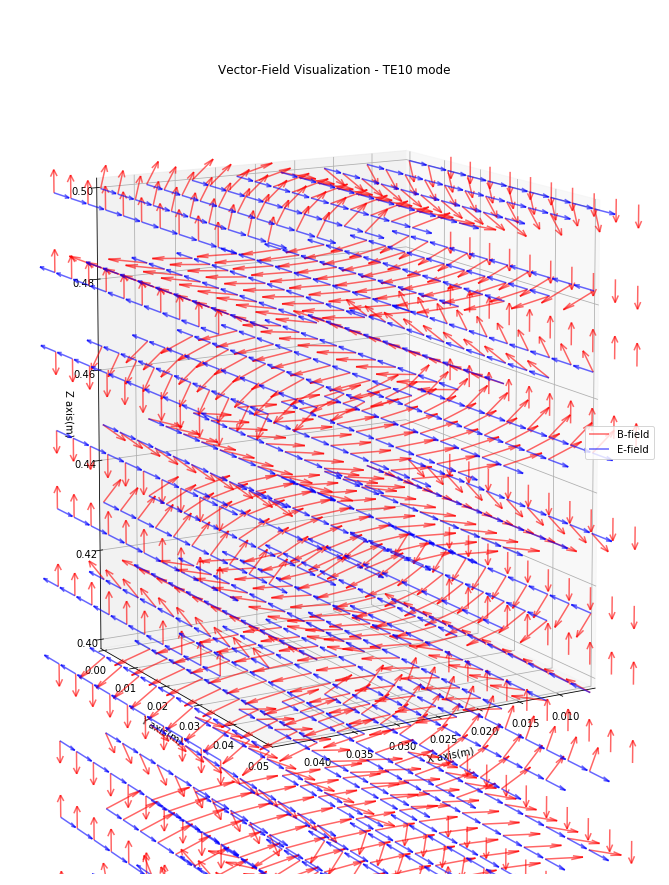

End of Simulation


In [3]:
import numpy as np
import matplotlib.pylab as pylab
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#----------------------------------------
#Start of parameter setting(SI-unit)

#Shape of Waveguide(Rectangle) L:z-dir WD:y-dir H:z-dir
L = 0.5; WD = 0.05; H = 0.05

#The Number of points for oberservation on each dir, delta: thickness of the waveguide
numberx = 10; numbery = 10; numberz = 30; delta = 0

#Wave Property in vaccum
f = 5*10**9; w = 2*math.pi*f; C = 3*10**8; mu = 4*math.pi*(10**-7)

#WaveGuide Mode & Field to Simulate
mode = 'TE'; m = 1; n = 0

if mode=='TM' and (m==0 or n==0):
    print('Error:No TM10(01) mode!')

#Parameters for Observation
size = (9,12)
fig = pylab.figure(figsize=size)
ax = Axes3D(fig)
'''
#ax.view_int(deg1,deg2) - deg1:inclination; deg2:rotaion(on x-y plane) - unit:deg
#if there is nothing in the parentheses of ax.view_init(), system default(30,-60)

'''
ax.view_init(10,60)

#Range of display on z-dir
Range=(0.4,0.5)

#Parameters
h2 = (m*math.pi/H)**2+(n*math.pi/WD)**2

cutoff = (C*math.sqrt((m*math.pi/H)**2+(n*math.pi/WD)**2))/(2*math.pi)
print('Cutoff frequency:',cutoff,'Hz')

if ((w/C)**2-h2) <= 0:
    print('Error:Under Cutoff frequency!')
    
else:
    print('Start simulating...')

Gamma = 1j * math.sqrt((w/C)**2-h2)

#End of parameter setting
#----------------------------------------

#Constructing Space
x=np.linspace(0+delta, H-delta, numberx)
y=np.linspace(0+delta, WD-delta,numbery)
z=np.linspace(0+delta, L-delta, numberz)

X, Y, Z = np.meshgrid(x, y, z)

#TE-mode Simulation
if mode == 'TE':
    
    B0 = 1
    alpha = math.pi/4
    BT = B0*(math.cos(alpha)+1j*math.sin(alpha))
    ex = np.exp(-Gamma*Z)
    
    Bz = ( BT * np.cos(m/H*math.pi*X) * np.cos(n/WD*math.pi*Y) * ex).real
    Bx = ( BT * (Gamma/h2)*(m*math.pi/H ) * np.sin(m*math.pi/H*X) * np.cos(n/WD*math.pi*Y) * ex).real
    By = ( BT * (Gamma/h2)*(n*math.pi/WD) * np.cos(m*math.pi/H*X) * np.sin(n/WD*math.pi*Y) * ex).real
    
    Ez = 0 * X 
    Ex = ( BT * (( 1j)*w*mu/h2) * (n*math.pi/WD) * np.cos(m*math.pi/H*X) * np.sin(n/WD*math.pi*Y) * ex).real
    Ey = ( BT * ((-1j)*w*mu/h2) * (m*math.pi/H ) * np.sin(m*math.pi/H*X) * np.cos(n/WD*math.pi*Y) * ex).real
    
#TM-mode Simulation
elif mode == 'TM':
    
    E0 = 1
    alpha = math.pi/4
    ET = E0*(math.cos(alpha)+1j*math.sin(alpha))
    ex = np.exp(-Gamma*Z)

    Ez = ( ET * np.sin(m/H*math.pi*X) * np.sin(n/WD*math.pi*Y) * ex).real
    Ex = ( ET * (-Gamma/h2) * (m*math.pi/H) * np.cos(m*math.pi/H*X) * np.sin(n/WD*math.pi*Y) * ex).real
    Ey = ( ET * (-Gamma/h2) * (m*math.pi/H) * np.sin(m*math.pi/H*X) * np.cos(n/WD*math.pi*Y) * ex).real
    
    Bz = 0 * X 
    Bx = ( ET * (( 1j)*w*mu/h2) * (n*math.pi/WD) * np.sin(m*math.pi/H*X) * np.cos(n/WD*math.pi*Y) * ex).real
    By = ( ET * ((-1j)*w*mu/h2) * (m*math.pi/H ) * np.cos(m*math.pi/H*X) * np.sin(n/WD*math.pi*Y) * ex).real

#Field simulation
Bq = ax.quiver(X, Y, Z, Bx, By, Bz, length=0.005, normalize=True, alpha=0.6, color='red',label='B-field')
print('Quivering B-field...')
Eq = ax.quiver(X, Y, Z, Ex, Ey, Ez, length=0.005, normalize=True, alpha=0.6, color='blue',label='E-field')
print('Quivering E-field...')

#Visulization
m = str(m); n = str(n)
plt.title('Vector-Field Visualization - '+mode+m+n+' mode')
plt.axis('equal')

ax.set_xlim3d(0, H )
ax.set_ylim3d(0, WD)
ax.set_zlim3d(Range)
ax.set_xlabel('X axis(m)')
ax.set_ylabel('Y axis(m)')
ax.set_zlabel('Z axis(m)')
ax.legend(loc='center right')
plt.show()
print('End of Simulation')